Identify the optimal location to place an ATM considering demographic features and provide insight to the decision makers. Majority of the script consists of EDA.

In [1]:
# library to handle data in a vectorized manner
import numpy as np 

# library for data analsysis
import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# library to handle JSON files
import json 

# convert an address into latitude and longitude values
from geopy.geocoders import Nominatim 


# library to handle requests
import requests 
# tranform JSON file into a pandas dataframe
from pandas import json_normalize 

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

# map rendering library
import folium 

#to tackle unnecesssary warnings coming ahead
import warnings
warnings.filterwarnings("ignore")

# library for web scraping
from bs4 import BeautifulSoup


**Web Scraping data and transforming it into pandas dataframe**

In [2]:
#Vancouver Postal Codes

url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_V"

html_contents = requests.get(url).text

#Web Scrapping (Part_1)
soup = BeautifulSoup(html_contents, "lxml")
print(soup)

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-sticky-header-enabled vector-toc-not-available" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>List of postal codes of Canada: V - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-con

In [3]:
#Web Scrapping (Part_2)
tab = soup.find_all('div', id = 'mw-content-text')

for rows in tab:
    data = rows.find('tbody').text

with open ('html_file_1', 'a') as f:
    f.write(str(data))


a_file = open("html_file_1", "r")
#print(a_file.read())

van_list_of_lists = [(line.strip()).split() for line in a_file]
#print(van_list_of_lists)

a_file.close()


van_list = [x for x in van_list_of_lists if x != []]
# print(van_list)

In [4]:
#Transforming obtained data in dataframe
v_df=pd.DataFrame(van_list)
print(v_df)

                               0                              1   \
0                    V1AKimberley                           None   
1                    V2APenticton                           None   
2                      V3ALangley               Township(Langley   
3              V4ASurreySouthwest                           None   
4           V5ABurnaby(Government                           Road   
5         V6AVancouver(Strathcona                              /   
6                V7ARichmondSouth                           None   
7                       V8APowell                          River   
8                 V9AVictoria(Vic                           West   
9                   V1BVernonEast                           None   
10           V2BKamloopsNorthwest                           None   
11                        V3BPort               CoquitlamCentral   
12                       V4BWhite                           Rock   
13    V5BBurnaby(Parkcrest-Aubrey               

In [5]:
v_df['Postal Code'] = v_df[0].str[0:3]
print(v_df['Postal Code'])

0      V1A
1      V2A
2      V3A
3      V4A
4      V5A
5      V6A
6      V7A
7      V8A
8      V9A
9      V1B
10     V2B
11     V3B
12     V4B
13     V5B
14     V6B
15     V7B
16     V8B
17     V9B
18     V1C
19     V2C
20     V3C
21     V4C
22     V5C
23     V6C
24     V7C
25     V8C
26     V9C
27     V1E
28     V2E
29     V3E
30     V4E
31     V5E
32     V6E
33     V7E
34     V8E
35     V9E
36     V1G
37     V2G
38     V3G
39     V4G
40     V5G
41     V6G
42     V7G
43     V8G
44     V9G
45     V1H
46     V2H
47     V3H
48     V4H
49     V5H
50     V6H
51     V7H
52     V8H
53     V9H
54     V1J
55     V2J
56     V3J
57     V4J
58     V5J
59     V6J
60     V7J
61     V8J
62     V9J
63     V1K
64     V2K
65     V3K
66     V4K
67     V5K
68     V6K
69     V7K
70     V8K
71     V9K
72     V1L
73     V2L
74     V3L
75     V4L
76     V5L
77     V6L
78     V7L
79     V8L
80     V9L
81     V1M
82     V2M
83     V3M
84     V4M
85     V5M
86     V6M
87     V7M
88     V8M
89     V9M
90     V1N

In [6]:
# doing analysis to get borough and neighbourhood data
v_df['tst'] = v_df[0].str[3:] + v_df[1]
print(v_df['tst'])

0                                      NaN
1                                      NaN
2                  LangleyTownship(Langley
3                                      NaN
4                   Burnaby(GovernmentRoad
5                    Vancouver(Strathcona/
6                                      NaN
7                              PowellRiver
8                         Victoria(VicWest
9                                      NaN
10                                     NaN
11                    PortCoquitlamCentral
12                               WhiteRock
13               Burnaby(Parkcrest-Aubrey/
14                    Vancouver(NEDowntown
15                      Richmond(SeaIsland
16                                     NaN
17                  Victoria(WestHighlands
18                                     NaN
19                      KamloopsCentraland
20                      PortCoquitlamSouth
21                                     NaN
22                  Burnaby(BurnabyHeights
23         

In [7]:
#obtained borough data
v_df[['Borough','hood']] = v_df['tst'].str.split('(',n=1, expand=True)
print(v_df[['Borough','hood']])

                        Borough                       hood
0                           NaN                        NaN
1                           NaN                        NaN
2               LangleyTownship                    Langley
3                           NaN                        NaN
4                       Burnaby             GovernmentRoad
5                     Vancouver                Strathcona/
6                           NaN                        NaN
7                   PowellRiver                       None
8                      Victoria                    VicWest
9                           NaN                        NaN
10                          NaN                        NaN
11         PortCoquitlamCentral                       None
12                    WhiteRock                       None
13                      Burnaby          Parkcrest-Aubrey/
14                    Vancouver                 NEDowntown
15                     Richmond                  SeaIsla

In [8]:
#obtained neighbourhood data
v_df["hood2"] = v_df["hood"].str.cat(v_df[[2,3,4,5,6,7,8,9,10,11,12,13,14]].astype(str))

v_df[['Neighborhood','None']] = v_df['hood2'].str.split(')',n=1, expand=True)
v_df[['Neighborhood','None']]

,Neighborhood,None
0,NaN,NaN
1,NaN,NaN
2,LangleyCity,NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone
3,NaN,NaN
4,GovernmentRoad/LakeCity/SFU/BurnabyMountain,NoneNoneNoneNoneNone
5,Strathcona/Chinatown/DowntownEastside,NoneNoneNoneNoneNoneNoneNoneNoneNone
6,NaN,NaN
7,NaN,NaN
8,VicWest/Esquimalt,CanadianForces(MARPAC)NoneNoneNoneNoneNoneNone...
9,NaN,NaN


In [9]:
#drop empty values
v_postcode_df = v_df[['Postal Code', 'Borough', 'Neighborhood']]
v_postcode_df = v_postcode_df.dropna()

# generate comma separated values for neighbourhood
v_postcode_df['Neighborhood'] = v_postcode_df['Neighborhood'].str.replace('/',', ')
print(v_postcode_df)
len(v_postcode_df)


    Postal Code                  Borough  \
2           V3A          LangleyTownship   
4           V5A                  Burnaby   
5           V6A                Vancouver   
8           V9A                 Victoria   
13          V5B                  Burnaby   
14          V6B                Vancouver   
15          V7B                 Richmond   
17          V9B                 Victoria   
22          V5C                  Burnaby   
23          V6C                Vancouver   
26          V9C                 Victoria   
31          V5E                  Burnaby   
32          V6E                Vancouver   
35          V9E                 Victoria   
40          V5G                  Burnaby   
41          V6G                Vancouver   
49          V5H                  Burnaby   
50          V6H                Vancouver   
58          V5J                  Burnaby   
59          V6J                Vancouver   
67          V5K                Vancouver   
68          V6K                V

58

In [10]:
# Obtain Vancouver Postal Codes data
vancouver_df = v_postcode_df[v_postcode_df['Borough'].str.contains("Vancouver")].reset_index(drop=True)

# Add two empty columns for the Latitude and Longitude
vancouver_df['Latitude'] = ""
vancouver_df['Longitude'] = ""

print(vancouver_df)
vancouver_df.shape

   Postal Code    Borough                                       Neighborhood  \
0          V6A  Vancouver            Strathcona, Chinatown, DowntownEastside   
1          V6B  Vancouver  NEDowntown, Gastown, HarbourCentre, Internatio...   
2          V6C  Vancouver               Waterfront, CoalHarbour, CanadaPlace   
3          V6E  Vancouver                            SEWestEnd, DavieVillage   
4          V6G  Vancouver                             NWWestEnd, StanleyPark   
5          V6H  Vancouver       WestFairview, GranvilleIsland, NEShaughnessy   
6          V6J  Vancouver            NWShaughnessy, EastKitsilano, Quilchena   
7          V5K  Vancouver                              NorthHastings-Sunrise   
8          V6K  Vancouver                        CentralKitsilano, Greektown   
9          V5L  Vancouver                            NorthGrandview-Woodland   
10         V6L  Vancouver                NWArbutusRidge, NEDunbar-Southlands   
11         V5M  Vancouver    SouthHastin

(29, 5)

In [11]:
# Fetching Latitude and Longitude values for the respective boroughs using Nominatim (geocoding API to work with OSM data)

geolocator = Nominatim(user_agent='Vancouver')

for i in vancouver_df.index:
    try:
        location = geolocator.geocode(vancouver_df['Postal Code'][i])
        
        vancouver_df.loc[i,'Latitude'] = location.latitude
        vancouver_df.loc[i,'Longitude'] = location.longitude
    except:
        vancouver_df.loc[i,'Latitude'] = ''
        vancouver_df.loc[i,'Longitude'] = ''
        
vancouver_df.head()  

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,V6A,Vancouver,"Strathcona, Chinatown, DowntownEastside",49.278418,-123.091331
1,V6B,Vancouver,"NEDowntown, Gastown, HarbourCentre, Internatio...",49.281963,-123.111625
2,V6C,Vancouver,"Waterfront, CoalHarbour, CanadaPlace",49.287572,-123.11457
3,V6E,Vancouver,"SEWestEnd, DavieVillage",49.282353,-123.131364
4,V6G,Vancouver,"NWWestEnd, StanleyPark",49.300401,-123.139077


In [12]:
vancouver_df.shape

(29, 5)

In [13]:
print(vancouver_df)

   Postal Code    Borough                                       Neighborhood  \
0          V6A  Vancouver            Strathcona, Chinatown, DowntownEastside   
1          V6B  Vancouver  NEDowntown, Gastown, HarbourCentre, Internatio...   
2          V6C  Vancouver               Waterfront, CoalHarbour, CanadaPlace   
3          V6E  Vancouver                            SEWestEnd, DavieVillage   
4          V6G  Vancouver                             NWWestEnd, StanleyPark   
5          V6H  Vancouver       WestFairview, GranvilleIsland, NEShaughnessy   
6          V6J  Vancouver            NWShaughnessy, EastKitsilano, Quilchena   
7          V5K  Vancouver                              NorthHastings-Sunrise   
8          V6K  Vancouver                        CentralKitsilano, Greektown   
9          V5L  Vancouver                            NorthGrandview-Woodland   
10         V6L  Vancouver                NWArbutusRidge, NEDunbar-Southlands   
11         V5M  Vancouver    SouthHastin

In [14]:
# Further cleaning of the data frame
vancouver_df = vancouver_df[vancouver_df.Latitude != 'Not assigned']
vancouver_df = vancouver_df[vancouver_df.Latitude != '']
vancouver_df = vancouver_df.astype({"Latitude": float, "Longitude": float})

len(vancouver_df)



29

In [15]:
vancouver_df['Neighborhood'] = vancouver_df['Neighborhood'].str.replace(r'(\w)([A-Z])', r'\1 \2')
vancouver_df['Neighborhood'] = vancouver_df['Neighborhood'].str.replace(r'(\w)([A-Z])', r'\1 \2')

vancouver_df.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,V6A,Vancouver,"Strathcona, Chinatown, DowntownEastside",49.278418,-123.091331
1,V6B,Vancouver,"NEDowntown, Gastown, HarbourCentre, Internatio...",49.281963,-123.111625
2,V6C,Vancouver,"Waterfront, CoalHarbour, CanadaPlace",49.287572,-123.114570
3,V6E,Vancouver,"SEWestEnd, DavieVillage",49.282353,-123.131364
4,V6G,Vancouver,"NWWestEnd, StanleyPark",49.300401,-123.139077


In [16]:
#to get the geographical coordinates of Toronto

address = 'Vancouver, VAN'

geolocator = Nominatim(user_agent="van_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Vancouver are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Vancouver are 52.3730865, 4.8540667.


In [17]:
# Visualize the Neighborhoods in Vancouver.
#The geograpical coordinate of Vancouver are 49.2608724, -123.1139529

map_vancouver = folium.Map(location=[49.2608724, -123.1139529], zoom_start=11)

for lat, lng, label in zip(vancouver_df['Latitude'], vancouver_df['Longitude'], vancouver_df['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_vancouver)  
    
map_vancouver

**Define Foursquare Credentials**

In [18]:
url = "https://api.foursquare.com/v3/places/search"

headers = {
    "Accept": "application/json",
    "Authorization": "fsq3F2O3daZJloci4JeacV3GVN1rIk+ZdhdXJz8AnU7nrQs="
}

Used the 'ATM' search query to find all ATMs in a defined radius

In [19]:
params = {
    "query": "ATM",
    "ll": "49.2608724,-123.1139529",
    "radius": "5000",
    "limit": "50"
}

Sent the GET request and examined the resutls

In [20]:
van_results = requests.request("GET", url, params=params, headers=headers).json()

van_results

{'results': [{'fsq_id': '4ad7bccff964a520480e21e3',
   'categories': [{'id': 11046,
     'name': 'Banking and Finance',
     'short_name': 'Banking and Finance',
     'plural_name': 'Banking and Finances',
     'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/financial_',
      'suffix': '.png'}}],
   'chains': [],
   'closed_bucket': 'LikelyOpen',
   'distance': 1581,
   'geocodes': {'main': {'latitude': 49.27428, 'longitude': -123.121281},
    'roof': {'latitude': 49.27428, 'longitude': -123.121281}},
   'link': '/v3/places/4ad7bccff964a520480e21e3',
   'location': {'address': '1196 Pacific Blvd',
    'country': 'CA',
    'cross_street': 'at Davie St',
    'formatted_address': '1196 Pacific Blvd (at Davie St), Vancouver BC V6Z 2X7',
    'locality': 'Vancouver',
    'postcode': 'V6Z 2X7',
    'region': 'BC'},
   'name': 'RBC Royal Bank',
   'related_places': {},
   'timezone': 'America/Vancouver'},
  {'fsq_id': '4457ba614549443065ad74cc',
   'categories': [{'id': 11044

In [21]:
#%run main.py

#search_query = 'ATM'
#radius = 50000  #Radius of search in meters

#CLIENT_ID = 'OI1LUQG3B11WTA53QKQJCO4REUN2NUCOL0GAIDEYYFT5W00T' # enter your Foursquare ID here!
#CLIENT_SECRET = 'OI1LUQG3B11WTA53QKQJCO4REUN2NUCOL0GAIDEYYFT5W00T' # enter your Foursquare Secret here!
#VERSION = '20180604' # what version of Foursquare you want to use
#LIMIT = 20 # max limit is 50 
#print('Your credentails:')
#print('CLIENT_ID: ' + CLIENT_ID)
#print('CLIENT_SECRET:' + CLIENT_SECRET)

#url = 'https://api.foursquare.com/v3/places/search?client_id={}&client_secret={}&query={}&ll={},{}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
#van_results = requests.get(url).json()

Transform JSON file to a data frame

In [22]:
# assign relevant part of JSON to venues
van_venues = van_results['results']

# tranform venues into a dataframe
van_dataframe = pd.json_normalize(van_venues)
van_dataframe.head()
#len(van_dataframe)

,fsq_id,categories,chains,closed_bucket,distance,link,name,timezone,geocodes.main.latitude,geocodes.main.longitude,geocodes.roof.latitude,geocodes.roof.longitude,location.address,location.country,location.cross_street,location.formatted_address,location.locality,location.postcode,location.region,geocodes.drop_off.latitude,geocodes.drop_off.longitude,location.address_extended,location.po_box,related_places.children
0,4ad7bccff964a520480e21e3,"[{'id': 11046, 'name': 'Banking and Finance', ...",[],LikelyOpen,1581,/v3/places/4ad7bccff964a520480e21e3,RBC Royal Bank,America/Vancouver,49.274280,-123.121281,49.274280,-123.121281,1196 Pacific Blvd,CA,at Davie St,"1196 Pacific Blvd (at Davie St), Vancouver BC ...",Vancouver,V6Z 2X7,BC,NaN,NaN,NaN,NaN,NaN
1,4457ba614549443065ad74cc,"[{'id': 11044, 'name': 'ATM', 'short_name': 'A...",[],VeryLikelyOpen,763,/v3/places/4457ba614549443065ad74cc,President's Choice Financial ATM,America/Vancouver,49.263701,-123.123541,49.263701,-123.123541,885 Broadway W,CA,NaN,"885 Broadway W, Vancouver BC V5Z 1J9",Vancouver,V5Z 1J9,BC,49.263367,-123.123548,NaN,NaN,NaN
2,5cf531ed35811b002c5c7ed9,"[{'id': 11044, 'name': 'ATM', 'short_name': 'A...",[],LikelyOpen,763,/v3/places/5cf531ed35811b002c5c7ed9,President's Choice Financial ATM,America/Vancouver,49.263701,-123.123541,49.263701,-123.123541,885 Broadway W,CA,,"885 Broadway W, Vancouver BC V5Z 1J9",Vancouver,V5Z 1J9,BC,49.263367,-123.123548,NaN,NaN,NaN
3,5bbd6e6fdff815002ca324cb,"[{'id': 11044, 'name': 'ATM', 'short_name': 'A...",[],LikelyOpen,960,/v3/places/5bbd6e6fdff815002ca324cb,TD Canada Trust ATM,America/Vancouver,49.260462,-123.100718,49.260462,-123.100718,5900 Westminster Hwy,CA,,"5900 Westminster Hwy, Vancouver BC V7C 1C4",Vancouver,V7C 1C4,BC,NaN,NaN,NaN,NaN,NaN
4,4bc376d52a89ef3bd410f588,"[{'id': 11046, 'name': 'Banking and Finance', ...",[],VeryLikelyOpen,2715,/v3/places/4bc376d52a89ef3bd410f588,RBC Royal Bank,America/Vancouver,49.285305,-123.113460,49.285305,-123.113460,685 Hastings St W,CA,Granville St,"685 Hastings St W (Granville St), Vancouver BC...",Vancouver,V6B 1N9,BC,49.285117,-123.113582,NaN,NaN,NaN


In [23]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in van_dataframe.columns if col.startswith('location.') or col.startswith('geocodes.main.')] + ['fsq_id']
dataframe_filtered = van_dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)


In [24]:
# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered.head()

,name,categories,latitude,longitude,address,country,cross_street,formatted_address,locality,postcode,region,address_extended,po_box,fsq_id
0,RBC Royal Bank,Banking and Finance,49.274280,-123.121281,1196 Pacific Blvd,CA,at Davie St,"1196 Pacific Blvd (at Davie St), Vancouver BC ...",Vancouver,V6Z 2X7,BC,NaN,NaN,4ad7bccff964a520480e21e3
1,President's Choice Financial ATM,ATM,49.263701,-123.123541,885 Broadway W,CA,NaN,"885 Broadway W, Vancouver BC V5Z 1J9",Vancouver,V5Z 1J9,BC,NaN,NaN,4457ba614549443065ad74cc
2,President's Choice Financial ATM,ATM,49.263701,-123.123541,885 Broadway W,CA,,"885 Broadway W, Vancouver BC V5Z 1J9",Vancouver,V5Z 1J9,BC,NaN,NaN,5cf531ed35811b002c5c7ed9
3,TD Canada Trust ATM,ATM,49.260462,-123.100718,5900 Westminster Hwy,CA,,"5900 Westminster Hwy, Vancouver BC V7C 1C4",Vancouver,V7C 1C4,BC,NaN,NaN,5bbd6e6fdff815002ca324cb
4,RBC Royal Bank,Banking and Finance,49.285305,-123.113460,685 Hastings St W,CA,Granville St,"685 Hastings St W (Granville St), Vancouver BC...",Vancouver,V6B 1N9,BC,NaN,NaN,4bc376d52a89ef3bd410f588


Rename all category names to 'ATM'

In [25]:
dataframe_filtered['categories'] = 'ATM'
#len(dataframe_filtered)
dataframe_filtered.head()

,name,categories,latitude,longitude,address,country,cross_street,formatted_address,locality,postcode,region,address_extended,po_box,fsq_id
0,RBC Royal Bank,ATM,49.274280,-123.121281,1196 Pacific Blvd,CA,at Davie St,"1196 Pacific Blvd (at Davie St), Vancouver BC ...",Vancouver,V6Z 2X7,BC,NaN,NaN,4ad7bccff964a520480e21e3
1,President's Choice Financial ATM,ATM,49.263701,-123.123541,885 Broadway W,CA,NaN,"885 Broadway W, Vancouver BC V5Z 1J9",Vancouver,V5Z 1J9,BC,NaN,NaN,4457ba614549443065ad74cc
2,President's Choice Financial ATM,ATM,49.263701,-123.123541,885 Broadway W,CA,,"885 Broadway W, Vancouver BC V5Z 1J9",Vancouver,V5Z 1J9,BC,NaN,NaN,5cf531ed35811b002c5c7ed9
3,TD Canada Trust ATM,ATM,49.260462,-123.100718,5900 Westminster Hwy,CA,,"5900 Westminster Hwy, Vancouver BC V7C 1C4",Vancouver,V7C 1C4,BC,NaN,NaN,5bbd6e6fdff815002ca324cb
4,RBC Royal Bank,ATM,49.285305,-123.113460,685 Hastings St W,CA,Granville St,"685 Hastings St W (Granville St), Vancouver BC...",Vancouver,V6B 1N9,BC,NaN,NaN,4bc376d52a89ef3bd410f588


In [26]:
# Export file to csv
dataframe_filtered.to_csv(r"ATM_Vancouver.csv")

To visualize the ATM locations in Vancouver.

In [27]:
ATM_map = folium.Map(location=[49.2608724,-123.1139529], zoom_start=11) # generate map centred around the Conrad Hotel


# add the Italian restaurants as blue circle markers
for lat, lng, label in zip(dataframe_filtered.latitude, dataframe_filtered.longitude, dataframe_filtered.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=4,
        color='blue',
        popup=label,
        fill = True,
        fill_color='pink',
        fill_opacity=0.8
    ).add_to(ATM_map)

# display map
ATM_map

Repeating the same process for the train station as well

In [28]:
params = {
    "query": "Train Station",
    "ll": "49.2608724,-123.1139529",
    "radius": "5000",
    "limit": "50"
}

ts_results = requests.request("GET", url, params=params, headers=headers).json()

ts_results

{'results': [{'fsq_id': '51007a21e4b03391a9c26c44',
   'categories': [{'id': 19047,
     'name': 'Rail Station',
     'short_name': 'Rail Station',
     'plural_name': 'Rail Stations',
     'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/travel/trainstation_',
      'suffix': '.png'}}],
   'chains': [],
   'closed_bucket': 'LikelyOpen',
   'distance': 2790,
   'geocodes': {'main': {'latitude': 49.286005, 'longitude': -123.111816},
    'roof': {'latitude': 49.286005, 'longitude': -123.111816}},
   'link': '/v3/places/51007a21e4b03391a9c26c44',
   'location': {'address': '601 Cordova St W',
    'country': 'CA',
    'cross_street': 'at Waterfront Station',
    'formatted_address': '601 Cordova St W (at Waterfront Station), Vancouver BC',
    'locality': 'Vancouver',
    'region': 'BC'},
   'name': 'West Coast Express - Waterfront Station',
   'related_places': {'parent': {'fsq_id': '4aa7d3b1f964a5206a4d20e3',
     'categories': [{'id': 19000,
       'name': 'Travel and Transpor

In [29]:
# assign relevant part of JSON to venues
ts_venues = ts_results['results']

# tranform venues into a dataframe
ts_dataframe = json_normalize(ts_venues)
ts_dataframe.head()
#len(ts_dataframe)

,fsq_id,categories,chains,closed_bucket,distance,link,name,timezone,geocodes.main.latitude,geocodes.main.longitude,geocodes.roof.latitude,geocodes.roof.longitude,location.address,location.country,location.cross_street,location.formatted_address,location.locality,location.region,related_places.parent.fsq_id,related_places.parent.categories,related_places.parent.name,related_places.children,location.postcode,geocodes.drop_off.latitude,geocodes.drop_off.longitude,location.address_extended,location.po_box
0,51007a21e4b03391a9c26c44,"[{'id': 19047, 'name': 'Rail Station', 'short_...",[],LikelyOpen,2790,/v3/places/51007a21e4b03391a9c26c44,West Coast Express - Waterfront Station,America/Vancouver,49.286005,-123.111816,49.286005,-123.111816,601 Cordova St W,CA,at Waterfront Station,"601 Cordova St W (at Waterfront Station), Vanc...",Vancouver,BC,4aa7d3b1f964a5206a4d20e3,"[{'id': 19000, 'name': 'Travel and Transportat...",SkyTrain-Waterfront,[],NaN,NaN,NaN,NaN,NaN
1,4aa7536ef964a520b44c20e3,"[{'id': 17134, 'name': 'Tobacco Store', 'short...",[],LikelyOpen,1835,/v3/places/4aa7536ef964a520b44c20e3,Pacific Central Station (XEA),America/Vancouver,49.273708,-123.098032,49.273708,-123.098032,1150 Station St,CA,at Terminal Ave,"1150 Station St (at Terminal Ave), Vancouver B...",Vancouver,BC,NaN,NaN,NaN,"[{'fsq_id': '4bc139d7abf49521cbd3c093', 'categ...",V6A 4C7,NaN,NaN,NaN,NaN
2,5b44b70ed3cce80039edcccf,"[{'id': 19047, 'name': 'Rail Station', 'short_...",[],LikelyOpen,1822,/v3/places/5b44b70ed3cce80039edcccf,The Canadian Prestige Lounge,America/Vancouver,49.273744,-123.097954,49.273744,-123.097954,NaN,CA,,Vancouver BC V6A 4C7,Vancouver,BC,4aa7536ef964a520b44c20e3,"[{'id': 17134, 'name': 'Tobacco Store', 'short...",Transit Shop Pacific Central,NaN,V6A 4C7,NaN,NaN,NaN,NaN
3,62a56a4d2d9be960484c57f6,"[{'id': 19047, 'name': 'Rail Station', 'short_...",[],LikelyOpen,1974,/v3/places/62a56a4d2d9be960484c57f6,Cn Rail Vancouver Main Yard,America/Vancouver,49.269679,-123.090307,NaN,NaN,NaN,CA,,Vancouver BC V6A 2M5,Vancouver,BC,NaN,NaN,NaN,NaN,V6A 2M5,NaN,NaN,NaN,NaN
4,4aad5c1cf964a520e65f20e3,"[{'id': 19047, 'name': 'Rail Station', 'short_...",[],LikelyOpen,2457,/v3/places/4aad5c1cf964a520e65f20e3,International News Granville Station,America/Vancouver,49.282881,-123.117310,49.282881,-123.117310,Granville Sta,CA,,"Granville Sta, Vancouver BC",Vancouver,BC,NaN,NaN,NaN,NaN,NaN,49.282975,-123.117372,NaN,NaN


In [30]:
# keep only columns that include venue name, and anything that is associated with location
ts_filtered_columns = ['name', 'categories'] + [col for col in ts_dataframe.columns if col.startswith('location.') or col.startswith('geocodes.main.')] + ['fsq_id']
ts_dataframe_filtered = ts_dataframe.loc[:, ts_filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
ts_dataframe_filtered['categories'] = ts_dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
ts_dataframe_filtered.columns = [column.split('.')[-1] for column in ts_dataframe_filtered.columns]

ts_dataframe_filtered.head()
len(ts_dataframe_filtered)

14

In [31]:
ts_dataframe_filtered['categories'] = 'Train Station'

In [32]:
venues_map2 = folium.Map(location=[49.2608724,-123.1139529], zoom_start=11) # generate map centred around the Conrad Hotel

# add train station as green circle markers
for lat, lng, label in zip(ts_dataframe_filtered.latitude, ts_dataframe_filtered.longitude, ts_dataframe_filtered.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='green',
        popup=label,
        fill = True,
        fill_color='green',
        fill_opacity=0.6
    ).add_to(venues_map2)

    
# add ATM as blue circle markers
for lat, lng, label in zip(dataframe_filtered.latitude, dataframe_filtered.longitude, dataframe_filtered.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map2)
# display map
venues_map2

Repeating the same process for the gas station as well

In [33]:
params = {
    "query": "Gas Station",
    "ll": "49.2608724,-123.1139529",
    "radius": "5000",
    "limit": "50"
}

gs_venues = requests.request("GET", url, params=params, headers=headers).json()

gs_venues

{'results': [{'fsq_id': '4adbe86af964a520112b21e3',
   'categories': [{'id': 19007,
     'name': 'Fuel Station',
     'short_name': 'Fuel Station',
     'plural_name': 'Fuel Stations',
     'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/gas_',
      'suffix': '.png'}}],
   'chains': [],
   'closed_bucket': 'LikelyOpen',
   'distance': 4282,
   'geocodes': {'main': {'latitude': 49.26913, 'longitude': -123.056267},
    'roof': {'latitude': 49.26913, 'longitude': -123.056267}},
   'link': '/v3/places/4adbe86af964a520112b21e3',
   'location': {'address': '1720 Nanaimo St',
    'country': 'CA',
    'cross_street': '',
    'formatted_address': '1720 Nanaimo St, Vancouver BC V5N 5B9',
    'locality': 'Vancouver',
    'postcode': 'V5N 5B9',
    'region': 'BC'},
   'name': 'Chevron',
   'related_places': {},
   'timezone': 'America/Vancouver'},
  {'fsq_id': '4b664b87f964a520bf1c2be3',
   'categories': [{'id': 19007,
     'name': 'Fuel Station',
     'short_name': 'Fuel Station

In [34]:
# assign relevant part of JSON to venues
gs_venues = gs_venues['results']

# tranform venues into a dataframe
gs_dataframe = json_normalize(gs_venues)
gs_dataframe.head()

,fsq_id,categories,chains,closed_bucket,distance,link,name,timezone,geocodes.main.latitude,geocodes.main.longitude,geocodes.roof.latitude,geocodes.roof.longitude,location.address,location.country,location.cross_street,location.formatted_address,location.locality,location.postcode,location.region,geocodes.drop_off.latitude,geocodes.drop_off.longitude,related_places.children,location.address_extended
0,4adbe86af964a520112b21e3,"[{'id': 19007, 'name': 'Fuel Station', 'short_...",[],LikelyOpen,4282,/v3/places/4adbe86af964a520112b21e3,Chevron,America/Vancouver,49.269130,-123.056267,49.269130,-123.056267,1720 Nanaimo St,CA,,"1720 Nanaimo St, Vancouver BC V5N 5B9",Vancouver,V5N 5B9,BC,NaN,NaN,NaN,NaN
1,4b664b87f964a520bf1c2be3,"[{'id': 19007, 'name': 'Fuel Station', 'short_...",[{'id': '16e6c030-992b-0132-fd75-7a163eb2a6fc'...,VeryLikelyOpen,2618,/v3/places/4b664b87f964a520bf1c2be3,Shell,America/Vancouver,49.259874,-123.077875,49.259874,-123.077875,1295 12th Ave E,CA,,"1295 12th Ave E, Vancouver BC V5T 2J8",Vancouver,V5T 2J8,BC,NaN,NaN,NaN,NaN
2,4bf1ab063fa220a1d7911820,"[{'id': 19007, 'name': 'Fuel Station', 'short_...",[{'id': '16e6c030-992b-0132-fd75-7a163eb2a6fc'...,VeryLikelyOpen,1631,/v3/places/4bf1ab063fa220a1d7911820,Shell,America/Vancouver,49.248944,-123.127066,49.248944,-123.127066,4110 Oak St,CA,,"4110 Oak St, Vancouver BC V6H 2M9",Vancouver,V6H 2M9,BC,NaN,NaN,NaN,NaN
3,4aa967d6f964a5207f5320e3,"[{'id': 19007, 'name': 'Fuel Station', 'short_...",[],LikelyOpen,2618,/v3/places/4aa967d6f964a5207f5320e3,Petro-Canada,America/Vancouver,49.262666,-123.077949,49.262666,-123.077949,1289 Broadway E,CA,Clark Dr,"1289 Broadway E (Clark Dr), Vancouver BC V5T 1Y8",Vancouver,V5T 1Y8,BC,NaN,NaN,NaN,NaN
4,4b429b6af964a52066d725e3,"[{'id': 19007, 'name': 'Fuel Station', 'short_...",[{'id': '2fcbcd20-9c63-0132-6632-3c15c2dde6c8'...,LikelyOpen,2310,/v3/places/4b429b6af964a52066d725e3,Esso,America/Vancouver,49.279037,-123.129717,49.279037,-123.129717,1205 Burrard St,CA,at Davie,"1205 Burrard St (at Davie), Vancouver BC V6Z 1Z5",Vancouver,V6Z 1Z5,BC,49.278829,-123.129579,NaN,NaN


In [35]:
# keep only columns that include venue name, and anything that is associated with location
gs_filtered_columns = ['name', 'categories'] + [col for col in gs_dataframe.columns if col.startswith('location.') or col.startswith('geocodes.main.')] + ['fsq_id']
gs_dataframe_filtered = gs_dataframe.loc[:, gs_filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
gs_dataframe_filtered['categories'] = gs_dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
gs_dataframe_filtered.columns = [column.split('.')[-1] for column in gs_dataframe_filtered.columns]

gs_dataframe_filtered.head()

,name,categories,latitude,longitude,address,country,cross_street,formatted_address,locality,postcode,region,address_extended,fsq_id
0,Chevron,Fuel Station,49.269130,-123.056267,1720 Nanaimo St,CA,,"1720 Nanaimo St, Vancouver BC V5N 5B9",Vancouver,V5N 5B9,BC,NaN,4adbe86af964a520112b21e3
1,Shell,Fuel Station,49.259874,-123.077875,1295 12th Ave E,CA,,"1295 12th Ave E, Vancouver BC V5T 2J8",Vancouver,V5T 2J8,BC,NaN,4b664b87f964a520bf1c2be3
2,Shell,Fuel Station,49.248944,-123.127066,4110 Oak St,CA,,"4110 Oak St, Vancouver BC V6H 2M9",Vancouver,V6H 2M9,BC,NaN,4bf1ab063fa220a1d7911820
3,Petro-Canada,Fuel Station,49.262666,-123.077949,1289 Broadway E,CA,Clark Dr,"1289 Broadway E (Clark Dr), Vancouver BC V5T 1Y8",Vancouver,V5T 1Y8,BC,NaN,4aa967d6f964a5207f5320e3
4,Esso,Fuel Station,49.279037,-123.129717,1205 Burrard St,CA,at Davie,"1205 Burrard St (at Davie), Vancouver BC V6Z 1Z5",Vancouver,V6Z 1Z5,BC,NaN,4b429b6af964a52066d725e3


In [36]:
gs_dataframe_filtered['categories'] = 'Gas Station'
gs_dataframe_filtered.head()
#len(gs_dataframe_filtered)

,name,categories,latitude,longitude,address,country,cross_street,formatted_address,locality,postcode,region,address_extended,fsq_id
0,Chevron,Gas Station,49.269130,-123.056267,1720 Nanaimo St,CA,,"1720 Nanaimo St, Vancouver BC V5N 5B9",Vancouver,V5N 5B9,BC,NaN,4adbe86af964a520112b21e3
1,Shell,Gas Station,49.259874,-123.077875,1295 12th Ave E,CA,,"1295 12th Ave E, Vancouver BC V5T 2J8",Vancouver,V5T 2J8,BC,NaN,4b664b87f964a520bf1c2be3
2,Shell,Gas Station,49.248944,-123.127066,4110 Oak St,CA,,"4110 Oak St, Vancouver BC V6H 2M9",Vancouver,V6H 2M9,BC,NaN,4bf1ab063fa220a1d7911820
3,Petro-Canada,Gas Station,49.262666,-123.077949,1289 Broadway E,CA,Clark Dr,"1289 Broadway E (Clark Dr), Vancouver BC V5T 1Y8",Vancouver,V5T 1Y8,BC,NaN,4aa967d6f964a5207f5320e3
4,Esso,Gas Station,49.279037,-123.129717,1205 Burrard St,CA,at Davie,"1205 Burrard St (at Davie), Vancouver BC V6Z 1Z5",Vancouver,V6Z 1Z5,BC,NaN,4b429b6af964a52066d725e3


Repeating the same process for the supermarkets as well

In [37]:
params = {
    "query": "Supermarket",
    "ll": "49.2608724,-123.1139529",
    "radius": "5000",
    "limit": "50"
}

sm_venues = requests.request("GET", url, params=params, headers=headers).json()

sm_venues

{'results': [{'fsq_id': '4b4b80e4f964a5204f9e26e3',
   'categories': [{'id': 17069,
     'name': 'Grocery Store',
     'short_name': 'Grocery Store',
     'plural_name': 'Grocery Stores',
     'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/food_grocery_',
      'suffix': '.png'}}],
   'chains': [],
   'closed_bucket': 'LikelyOpen',
   'distance': 5008,
   'geocodes': {'main': {'latitude': 49.269004, 'longitude': -123.046195},
    'roof': {'latitude': 49.269004, 'longitude': -123.046195}},
   'link': '/v3/places/4b4b80e4f964a5204f9e26e3',
   'location': {'address': '2800 1st Ave E',
    'address_extended': '# 100',
    'country': 'CA',
    'cross_street': 'at Renfrew St.',
    'formatted_address': '2800 1st Ave E (at Renfrew St.), Vancouver BC V5M 4N8',
    'locality': 'Vancouver',
    'postcode': 'V5M 4N8',
    'region': 'BC'},
   'name': 'T&T Supermarket',
   'related_places': {'children': []},
   'timezone': 'America/Vancouver'},
  {'fsq_id': '5c8d8b7d4b78c50039a5e0

In [38]:
# assign relevant part of JSON to venues
sm_venues = sm_venues['results']

# tranform venues into a dataframe
sm_dataframe = json_normalize(sm_venues)
sm_dataframe.head()

,fsq_id,categories,chains,closed_bucket,distance,link,name,timezone,geocodes.main.latitude,geocodes.main.longitude,geocodes.roof.latitude,geocodes.roof.longitude,location.address,location.address_extended,location.country,location.cross_street,location.formatted_address,location.locality,location.postcode,location.region,related_places.children,geocodes.drop_off.latitude,geocodes.drop_off.longitude,related_places.parent.fsq_id,related_places.parent.categories,related_places.parent.name
0,4b4b80e4f964a5204f9e26e3,"[{'id': 17069, 'name': 'Grocery Store', 'short...",[],LikelyOpen,5008,/v3/places/4b4b80e4f964a5204f9e26e3,T&T Supermarket,America/Vancouver,49.269004,-123.046195,49.269004,-123.046195,2800 1st Ave E,# 100,CA,at Renfrew St.,"2800 1st Ave E (at Renfrew St.), Vancouver BC ...",Vancouver,V5M 4N8,BC,[],NaN,NaN,NaN,NaN,NaN
1,5c8d8b7d4b78c50039a5e010,"[{'id': 17069, 'name': 'Grocery Store', 'short...",[],VeryLikelyOpen,4294,/v3/places/5c8d8b7d4b78c50039a5e010,T&T Supermarket,America/Vancouver,49.242929,-123.061516,49.242929,-123.061516,2206 Kingsway,NaN,CA,,"2206 Kingsway, Vancouver BC V5N 2T7",Vancouver,V5N 2T7,BC,NaN,NaN,NaN,NaN,NaN,NaN
2,4aa807aff964a520dd4e20e3,"[{'id': 17000, 'name': 'Retail', 'short_name':...",[],LikelyOpen,3207,/v3/places/4aa807aff964a520dd4e20e3,Urban Fare,America/Vancouver,49.289192,-123.122635,49.289192,-123.122635,305 Bute St,NaN,CA,at W Cordova St.,"305 Bute St (at W Cordova St.), Vancouver BC V...",Vancouver,V6C 3T6,BC,NaN,NaN,NaN,NaN,NaN,NaN
3,4aa814faf964a5202c4f20e3,"[{'id': 17069, 'name': 'Grocery Store', 'short...",[{'id': '431e6c41-db3f-4608-8e06-d2a3345127fd'...,LikelyOpen,3291,/v3/places/4aa814faf964a5202c4f20e3,Safeway Canada,America/Vancouver,49.285456,-123.139270,49.285456,-123.139270,1641 Davie St,NaN,CA,at Cardero St,"1641 Davie St (at Cardero St), Vancouver BC V6...",Vancouver,V6G 1W1,BC,NaN,49.285559,-123.139205,NaN,NaN,NaN
4,4b12d1dbf964a520c18e23e3,"[{'id': 17056, 'name': 'Flower Store', 'short_...",[{'id': '431e6c41-db3f-4608-8e06-d2a3345127fd'...,LikelyOpen,3333,/v3/places/4b12d1dbf964a520c18e23e3,Canada Safeway Ltd,America/Vancouver,49.268597,-123.158183,49.268597,-123.158183,2315 4th Ave W,NaN,CA,at Vine St,"2315 4th Ave W (at Vine St), Vancouver BC V6K 1P2",Vancouver,V6K 1P2,BC,"[{'fsq_id': '5d8c914b340f9b00084d8de5', 'categ...",NaN,NaN,NaN,NaN,NaN


In [39]:
# keep only columns that include venue name, and anything that is associated with location
sm_filtered_columns = ['name', 'categories'] + [col for col in sm_dataframe.columns if col.startswith('location.') or col.startswith('geocodes.main.')] + ['fsq_id']
sm_dataframe_filtered = sm_dataframe.loc[:, sm_filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
sm_dataframe_filtered['categories'] = sm_dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
sm_dataframe_filtered.columns = [column.split('.')[-1] for column in sm_dataframe_filtered.columns]

sm_dataframe_filtered.head()

,name,categories,latitude,longitude,address,address_extended,country,cross_street,formatted_address,locality,postcode,region,fsq_id
0,T&T Supermarket,Grocery Store,49.269004,-123.046195,2800 1st Ave E,# 100,CA,at Renfrew St.,"2800 1st Ave E (at Renfrew St.), Vancouver BC ...",Vancouver,V5M 4N8,BC,4b4b80e4f964a5204f9e26e3
1,T&T Supermarket,Grocery Store,49.242929,-123.061516,2206 Kingsway,NaN,CA,,"2206 Kingsway, Vancouver BC V5N 2T7",Vancouver,V5N 2T7,BC,5c8d8b7d4b78c50039a5e010
2,Urban Fare,Retail,49.289192,-123.122635,305 Bute St,NaN,CA,at W Cordova St.,"305 Bute St (at W Cordova St.), Vancouver BC V...",Vancouver,V6C 3T6,BC,4aa807aff964a520dd4e20e3
3,Safeway Canada,Grocery Store,49.285456,-123.139270,1641 Davie St,NaN,CA,at Cardero St,"1641 Davie St (at Cardero St), Vancouver BC V6...",Vancouver,V6G 1W1,BC,4aa814faf964a5202c4f20e3
4,Canada Safeway Ltd,Flower Store,49.268597,-123.158183,2315 4th Ave W,NaN,CA,at Vine St,"2315 4th Ave W (at Vine St), Vancouver BC V6K 1P2",Vancouver,V6K 1P2,BC,4b12d1dbf964a520c18e23e3


In [40]:
sm_dataframe_filtered['categories'] = 'Supermarket'
sm_dataframe_filtered.head()

,name,categories,latitude,longitude,address,address_extended,country,cross_street,formatted_address,locality,postcode,region,fsq_id
0,T&T Supermarket,Supermarket,49.269004,-123.046195,2800 1st Ave E,# 100,CA,at Renfrew St.,"2800 1st Ave E (at Renfrew St.), Vancouver BC ...",Vancouver,V5M 4N8,BC,4b4b80e4f964a5204f9e26e3
1,T&T Supermarket,Supermarket,49.242929,-123.061516,2206 Kingsway,NaN,CA,,"2206 Kingsway, Vancouver BC V5N 2T7",Vancouver,V5N 2T7,BC,5c8d8b7d4b78c50039a5e010
2,Urban Fare,Supermarket,49.289192,-123.122635,305 Bute St,NaN,CA,at W Cordova St.,"305 Bute St (at W Cordova St.), Vancouver BC V...",Vancouver,V6C 3T6,BC,4aa807aff964a520dd4e20e3
3,Safeway Canada,Supermarket,49.285456,-123.139270,1641 Davie St,NaN,CA,at Cardero St,"1641 Davie St (at Cardero St), Vancouver BC V6...",Vancouver,V6G 1W1,BC,4aa814faf964a5202c4f20e3
4,Canada Safeway Ltd,Supermarket,49.268597,-123.158183,2315 4th Ave W,NaN,CA,at Vine St,"2315 4th Ave W (at Vine St), Vancouver BC V6K 1P2",Vancouver,V6K 1P2,BC,4b12d1dbf964a520c18e23e3


Repeating the same process for the malls as well

In [41]:
params = {
    "query": "Mall",
    "ll": "49.2608724,-123.1139529",
    "radius": "5000",
    "limit": "50"
}

m_venues = requests.request("GET", url, params=params, headers=headers).json()

m_venues

{'results': [{'fsq_id': '4aa7f799f964a5204c4e20e3',
   'categories': [{'id': 17114,
     'name': 'Shopping Mall',
     'short_name': 'Mall',
     'plural_name': 'Shopping Malls',
     'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/mall_',
      'suffix': '.png'}}],
   'chains': [],
   'closed_bucket': 'VeryLikelyOpen',
   'distance': 2519,
   'geocodes': {'main': {'latitude': 49.28341173638168,
     'longitude': -123.11773627996443}},
   'link': '/v3/places/4aa7f799f964a5204c4e20e3',
   'location': {'address': '701 W Georgia St',
    'address_extended': 'btwn Howe & Granville',
    'country': 'CA',
    'cross_street': 'btwn Howe & Granville',
    'formatted_address': '701 W Georgia St (btwn Howe & Granville), Vancouver BC',
    'locality': 'Vancouver',
    'region': 'BC'},
   'name': 'Garage Pacific Centre',
   'related_places': {'children': [{'fsq_id': '50c68ae6e4b0860fb515014a',
      'categories': [{'id': 13036,
        'name': 'Tea Room',
        'short_name': 'Te

In [42]:
# assign relevant part of JSON to venues
m_venues = m_venues['results']

# tranform venues into a dataframe
m_dataframe = json_normalize(m_venues)
m_dataframe.head()

,fsq_id,categories,chains,closed_bucket,distance,link,name,timezone,geocodes.main.latitude,geocodes.main.longitude,location.address,location.address_extended,location.country,location.cross_street,location.formatted_address,location.locality,location.region,related_places.children,geocodes.roof.latitude,geocodes.roof.longitude,location.postcode,geocodes.drop_off.latitude,geocodes.drop_off.longitude,location.po_box,related_places.parent.fsq_id,related_places.parent.categories,related_places.parent.name
0,4aa7f799f964a5204c4e20e3,"[{'id': 17114, 'name': 'Shopping Mall', 'short...",[],VeryLikelyOpen,2519,/v3/places/4aa7f799f964a5204c4e20e3,Garage Pacific Centre,America/Vancouver,49.283412,-123.117736,701 W Georgia St,btwn Howe & Granville,CA,btwn Howe & Granville,"701 W Georgia St (btwn Howe & Granville), Vanc...",Vancouver,BC,"[{'fsq_id': '50c68ae6e4b0860fb515014a', 'categ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4aa86e89f964a520435120e3,"[{'id': 12096, 'name': 'Senior Citizen Service...",[],LikelyOpen,3202,/v3/places/4aa86e89f964a520435120e3,Oakridge Centre,America/Vancouver,49.232743,-123.117009,650 41st Ave W,# 319,CA,at Cambie St,"650 41st Ave W (at Cambie St), Vancouver BC V5...",Vancouver,BC,"[{'fsq_id': '4e1806ba52b123a586d2d8f4', 'categ...",49.232743,-123.117009,V5Z 2M9,NaN,NaN,NaN,NaN,NaN,NaN
2,4e545505483b764fba20e43a,"[{'id': 17114, 'name': 'Shopping Mall', 'short...",[],LikelyOpen,2379,/v3/places/4e545505483b764fba20e43a,Granville Mall,America/Vancouver,49.283090,-123.117240,Granville St,NaN,CA,Hastings / Smithe St,"Granville St (Hastings / Smithe St), Vancouver BC",Vancouver,BC,"[{'fsq_id': '5a2af622a22db744e2627788', 'categ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4ac11ea5f964a520ec9520e3,"[{'id': 17065, 'name': 'Farmers Market', 'shor...",[],LikelyOpen,3460,/v3/places/4ac11ea5f964a520ec9520e3,Robson Public Market,America/Vancouver,49.289465,-123.132880,1610 Robson St,# 134,CA,at Cardero St.,"1610 Robson St (at Cardero St.), Vancouver BC ...",Vancouver,BC,"[{'fsq_id': '5a3b11a1d8096e20aec95bab', 'categ...",49.289465,-123.132880,V6G 1C7,NaN,NaN,NaN,NaN,NaN,NaN
4,4eb22bc10a9c47bf48df88f0,"[{'id': 17114, 'name': 'Shopping Mall', 'short...",[],LikelyOpen,172,/v3/places/4eb22bc10a9c47bf48df88f0,City Square Property Holdings,America/Vancouver,49.260682,-123.116309,555 12th Ave W,# 168,CA,NaN,"555 12th Ave W, Vancouver BC V5Z 3X7",Vancouver,BC,NaN,49.260682,-123.116309,V5Z 3X7,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
# keep only columns that include venue name, and anything that is associated with location
m_filtered_columns = ['name', 'categories'] + [col for col in m_dataframe.columns if col.startswith('location.') or col.startswith('geocodes.main.')] + ['fsq_id']
m_dataframe_filtered = m_dataframe.loc[:, m_filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
m_dataframe_filtered['categories'] = m_dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
m_dataframe_filtered.columns = [column.split('.')[-1] for column in m_dataframe_filtered.columns]

m_dataframe_filtered.head()

,name,categories,latitude,longitude,address,address_extended,country,cross_street,formatted_address,locality,region,postcode,po_box,fsq_id
0,Garage Pacific Centre,Shopping Mall,49.283412,-123.117736,701 W Georgia St,btwn Howe & Granville,CA,btwn Howe & Granville,"701 W Georgia St (btwn Howe & Granville), Vanc...",Vancouver,BC,NaN,NaN,4aa7f799f964a5204c4e20e3
1,Oakridge Centre,Senior Citizen Service,49.232743,-123.117009,650 41st Ave W,# 319,CA,at Cambie St,"650 41st Ave W (at Cambie St), Vancouver BC V5...",Vancouver,BC,V5Z 2M9,NaN,4aa86e89f964a520435120e3
2,Granville Mall,Shopping Mall,49.283090,-123.117240,Granville St,NaN,CA,Hastings / Smithe St,"Granville St (Hastings / Smithe St), Vancouver BC",Vancouver,BC,NaN,NaN,4e545505483b764fba20e43a
3,Robson Public Market,Farmers Market,49.289465,-123.132880,1610 Robson St,# 134,CA,at Cardero St.,"1610 Robson St (at Cardero St.), Vancouver BC ...",Vancouver,BC,V6G 1C7,NaN,4ac11ea5f964a520ec9520e3
4,City Square Property Holdings,Shopping Mall,49.260682,-123.116309,555 12th Ave W,# 168,CA,NaN,"555 12th Ave W, Vancouver BC V5Z 3X7",Vancouver,BC,V5Z 3X7,NaN,4eb22bc10a9c47bf48df88f0


In [44]:
m_dataframe_filtered['categories'] = 'Mall'
m_dataframe_filtered.head()

,name,categories,latitude,longitude,address,address_extended,country,cross_street,formatted_address,locality,region,postcode,po_box,fsq_id
0,Garage Pacific Centre,Mall,49.283412,-123.117736,701 W Georgia St,btwn Howe & Granville,CA,btwn Howe & Granville,"701 W Georgia St (btwn Howe & Granville), Vanc...",Vancouver,BC,NaN,NaN,4aa7f799f964a5204c4e20e3
1,Oakridge Centre,Mall,49.232743,-123.117009,650 41st Ave W,# 319,CA,at Cambie St,"650 41st Ave W (at Cambie St), Vancouver BC V5...",Vancouver,BC,V5Z 2M9,NaN,4aa86e89f964a520435120e3
2,Granville Mall,Mall,49.283090,-123.117240,Granville St,NaN,CA,Hastings / Smithe St,"Granville St (Hastings / Smithe St), Vancouver BC",Vancouver,BC,NaN,NaN,4e545505483b764fba20e43a
3,Robson Public Market,Mall,49.289465,-123.132880,1610 Robson St,# 134,CA,at Cardero St.,"1610 Robson St (at Cardero St.), Vancouver BC ...",Vancouver,BC,V6G 1C7,NaN,4ac11ea5f964a520ec9520e3
4,City Square Property Holdings,Mall,49.260682,-123.116309,555 12th Ave W,# 168,CA,NaN,"555 12th Ave W, Vancouver BC V5Z 3X7",Vancouver,BC,V5Z 3X7,NaN,4eb22bc10a9c47bf48df88f0


Concatenate the train station, gas station, supermarket and malls dataframes

In [45]:
al_df = pd.concat([ts_dataframe_filtered, gs_dataframe_filtered, sm_dataframe_filtered, m_dataframe_filtered])
al_df.head()

,name,categories,latitude,longitude,address,country,cross_street,formatted_address,locality,region,postcode,address_extended,po_box,fsq_id
0,West Coast Express - Waterfront Station,Train Station,49.286005,-123.111816,601 Cordova St W,CA,at Waterfront Station,"601 Cordova St W (at Waterfront Station), Vanc...",Vancouver,BC,NaN,NaN,NaN,51007a21e4b03391a9c26c44
1,Pacific Central Station (XEA),Train Station,49.273708,-123.098032,1150 Station St,CA,at Terminal Ave,"1150 Station St (at Terminal Ave), Vancouver B...",Vancouver,BC,V6A 4C7,NaN,NaN,4aa7536ef964a520b44c20e3
2,The Canadian Prestige Lounge,Train Station,49.273744,-123.097954,NaN,CA,,Vancouver BC V6A 4C7,Vancouver,BC,V6A 4C7,NaN,NaN,5b44b70ed3cce80039edcccf
3,Cn Rail Vancouver Main Yard,Train Station,49.269679,-123.090307,NaN,CA,,Vancouver BC V6A 2M5,Vancouver,BC,V6A 2M5,NaN,NaN,62a56a4d2d9be960484c57f6
4,International News Granville Station,Train Station,49.282881,-123.117310,Granville Sta,CA,,"Granville Sta, Vancouver BC",Vancouver,BC,NaN,NaN,NaN,4aad5c1cf964a520e65f20e3


Creating another data frame with specific columns from the concatenated data frame

In [46]:
al_df2 = al_df[['name', 'categories', 'latitude', 'longitude', 'address', 'locality']]

#Reset index numbers to start from 0
al_df2 = al_df2.reset_index()

Visualized the map of all the venues of interest representing areas with high footfall traffic

In [47]:
vancouver_map2 = folium.Map(location=[49.2608724,-123.1139529], zoom_start=13) # generate map centred around the Conrad Hotel

vancouver = folium.map.FeatureGroup()

for lat, lng in zip(al_df.latitude, al_df.longitude):
    vancouver.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='grey',
            fill=True,
            fill_color='grey',
            fill_opacity=0.6
        )
    )

# add incidents to map
vancouver_map2.add_child(vancouver)

adding ATM locations to the Map as well

In [48]:
for lat, lng, in zip(dataframe_filtered.latitude, dataframe_filtered.longitude):
    vancouver.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='red',
            fill=True,
            fill_color='red',
            fill_opacity=0.6
        )
    )

# add pop-up text to each marker on the map
latitudes = list(dataframe_filtered.latitude)
longitudes = list(dataframe_filtered.longitude)
labels = list(dataframe_filtered.categories)

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=label).add_to(vancouver_map2) 
    

vancouver_map2.add_child(vancouver)

Lets add relevant neighbourhood and postal code for each venue

In [ ]:
#define the user agent
geocoder = Nominatim(user_agent = 'your email id')

In [50]:
#set the ratelimiter
from geopy.extra.rate_limiter import RateLimiter
geocode = RateLimiter(geolocator.reverse,min_delay_seconds = 1, return_value_on_exception = None)

In [51]:
# creating a new column to store postal codes for the venues
al_df2['van_postcode'] = ''

In [52]:
# Iterate through the lat, long (reverse geocoding) to fetch all the postal codes

for index, row in al_df2.iterrows():
    try:
        location = geolocator.reverse("{}, {}".format(row['latitude'], row['longitude']))
        
        al_df2.loc[index,'van_postcode'] = location.raw['address']['postcode']
    except:
        al_df2.loc[index,'van_postcode'] = ''
         

al_df2.head()

,index,name,categories,latitude,longitude,address,locality,van_postcode
0,0,West Coast Express - Waterfront Station,Train Station,49.286005,-123.111816,601 Cordova St W,Vancouver,V6B
1,1,Pacific Central Station (XEA),Train Station,49.273708,-123.098032,1150 Station St,Vancouver,V6A
2,2,The Canadian Prestige Lounge,Train Station,49.273744,-123.097954,NaN,Vancouver,V6A 4C7
3,3,Cn Rail Vancouver Main Yard,Train Station,49.269679,-123.090307,NaN,Vancouver,V6A
4,4,International News Granville Station,Train Station,49.282881,-123.117310,Granville Sta,Vancouver,V6B


In [53]:
# add another column for the city districts
al_df2['van_city_district'] = ''

In [54]:
# Iterate through the lat, long (reverse geocoding) to fetch all the city district names
for index, row in al_df2.iterrows():
    try:
        location = geolocator.reverse("{}, {}".format(row['latitude'], row['longitude']))
        
        al_df2.loc[index,'van_city_district'] = location.raw['address']['city_district']
    except:
        al_df2.loc[index,'van_city_district'] = ''
         

al_df2.tail()

,index,name,categories,latitude,longitude,address,locality,van_postcode,van_city_district
142,28,Sinclair Centre,Mall,49.285809,-123.114152,228.75 Hastings St W,Vancouver,V6C,
143,29,Dior,Mall,49.283875,-123.117070,674 Granville St,Vancouver,V7Y 1G5,
144,30,West Georgia Law Holdings,Mall,49.287180,-123.124572,1185 Georgia St W,Vancouver,V6E,
145,31,Denman Place Dental Centre,Mall,49.288755,-123.138498,1030 Denman St,Vancouver,V6G,
146,32,Denman Place Mall,Mall,49.288786,-123.139068,1030 Denman St,Vancouver,V6G 2M6,


In [55]:
# add another column for the neighborhood names
al_df2['van_neighborhood'] = ''

In [56]:
# Iterate through the lat, long (reverse geocoding) to fetch all the neighborhood names

for index, row in al_df2.iterrows():
    try:
        location = geolocator.reverse("{}, {}".format(row['latitude'], row['longitude']))
        
        al_df2.loc[index,'van_neighborhood'] = location.raw['address']['neighbourhood']
    except:
        al_df2.loc[index,'van_neighborhood'] = ''
         

al_df2.head()

,index,name,categories,latitude,longitude,address,locality,van_postcode,van_city_district,van_neighborhood
0,0,West Coast Express - Waterfront Station,Train Station,49.286005,-123.111816,601 Cordova St W,Vancouver,V6B,,Gastown
1,1,Pacific Central Station (XEA),Train Station,49.273708,-123.098032,1150 Station St,Vancouver,V6A,,
2,2,The Canadian Prestige Lounge,Train Station,49.273744,-123.097954,NaN,Vancouver,V6A 4C7,,
3,3,Cn Rail Vancouver Main Yard,Train Station,49.269679,-123.090307,NaN,Vancouver,V6A,,
4,4,International News Granville Station,Train Station,49.282881,-123.117310,Granville Sta,Vancouver,V6B,,Yaletown


In [57]:
# cleaning the data frame to have a column with the first 3 characters of the postal code information
al_df2['van_postcode2'] = al_df2['van_postcode'].str[0:3]
al_df2.head()

,index,name,categories,latitude,longitude,address,locality,van_postcode,van_city_district,van_neighborhood,van_postcode2
0,0,West Coast Express - Waterfront Station,Train Station,49.286005,-123.111816,601 Cordova St W,Vancouver,V6B,,Gastown,V6B
1,1,Pacific Central Station (XEA),Train Station,49.273708,-123.098032,1150 Station St,Vancouver,V6A,,,V6A
2,2,The Canadian Prestige Lounge,Train Station,49.273744,-123.097954,NaN,Vancouver,V6A 4C7,,,V6A
3,3,Cn Rail Vancouver Main Yard,Train Station,49.269679,-123.090307,NaN,Vancouver,V6A,,,V6A
4,4,International News Granville Station,Train Station,49.282881,-123.117310,Granville Sta,Vancouver,V6B,,Yaletown,V6B


In [58]:
al_df2 = al_df2.rename(columns={"van_postcode2": "Postal Code"})
al_df2.head()

,index,name,categories,latitude,longitude,address,locality,van_postcode,van_city_district,van_neighborhood,Postal Code
0,0,West Coast Express - Waterfront Station,Train Station,49.286005,-123.111816,601 Cordova St W,Vancouver,V6B,,Gastown,V6B
1,1,Pacific Central Station (XEA),Train Station,49.273708,-123.098032,1150 Station St,Vancouver,V6A,,,V6A
2,2,The Canadian Prestige Lounge,Train Station,49.273744,-123.097954,NaN,Vancouver,V6A 4C7,,,V6A
3,3,Cn Rail Vancouver Main Yard,Train Station,49.269679,-123.090307,NaN,Vancouver,V6A,,,V6A
4,4,International News Granville Station,Train Station,49.282881,-123.117310,Granville Sta,Vancouver,V6B,,Yaletown,V6B


In [59]:
# merge the data frame
al_df3 = pd.merge(al_df2, vancouver_df, how='outer', on="Postal Code")
al_df3

van_data = al_df3[['name', 'categories', 'latitude', 'longitude', 'locality', 'Neighborhood', 'Postal Code']]
van_data.head()
#len(van_data)

,name,categories,latitude,longitude,locality,Neighborhood,Postal Code
0,NaN,NaN,NaN,NaN,NaN,NorthHastings-Sunrise,V5K
1,Shell,Gas Station,49.280783,-123.066097,Vancouver,NorthGrandview-Woodland,V5L
2,Petro-Pass Truck Stop,Gas Station,49.283078,-123.073757,Vancouver,NorthGrandview-Woodland,V5L
3,Jackson Auto Repair Ltd,Gas Station,49.281411,-123.066394,Vancouver,NorthGrandview-Woodland,V5L
4,Husky,Gas Station,49.285183,-123.063954,Vancouver,NorthGrandview-Woodland,V5L


In [60]:
# drop all duplicates
van_data.drop_duplicates(subset =['latitude', 'longitude'],keep = 'first', inplace = True)

In [61]:
van_data.shape

(146, 7)

In [62]:
# drop all NaN values
van_data2 = van_data.dropna()
van_data2.shape

(145, 7)

**Repeated the same process for ATM data and merging it with the other venues data**

In [63]:
ATM_data = dataframe_filtered[['name','categories','latitude','longitude']]
ATM_data.shape

(50, 4)

In [ ]:
geolocator = Nominatim(user_agent = 'your email id')
geocode = RateLimiter(geolocator.reverse,min_delay_seconds = 1, return_value_on_exception = None)

In [65]:
ATM_data['Postal Code'] = ''

In [66]:
for index, row in ATM_data.iterrows():
    try:
        location2 = geolocator.reverse("{}, {}".format(row['latitude'], row['longitude']))
        
        ATM_data.loc[index,'Postal Code'] = location2.raw['address']['postcode']
    except:
        ATM_data.loc[index,'Postal Code'] = ''
         

ATM_data.head()

,name,categories,latitude,longitude,Postal Code
0,RBC Royal Bank,ATM,49.274280,-123.121281,V6B
1,President's Choice Financial ATM,ATM,49.263701,-123.123541,V5Z
2,President's Choice Financial ATM,ATM,49.263701,-123.123541,V5Z
3,TD Canada Trust ATM,ATM,49.260462,-123.100718,V5T
4,RBC Royal Bank,ATM,49.285305,-123.113460,V6B 1G8


In [67]:
ATM_data['Postal Code2'] = ATM_data['Postal Code'].str[0:3]

In [68]:
ATM_data.head()

,name,categories,latitude,longitude,Postal Code,Postal Code2
0,RBC Royal Bank,ATM,49.274280,-123.121281,V6B,V6B
1,President's Choice Financial ATM,ATM,49.263701,-123.123541,V5Z,V5Z
2,President's Choice Financial ATM,ATM,49.263701,-123.123541,V5Z,V5Z
3,TD Canada Trust ATM,ATM,49.260462,-123.100718,V5T,V5T
4,RBC Royal Bank,ATM,49.285305,-123.113460,V6B 1G8,V6B


In [69]:
ATM_data = ATM_data[['name','categories','latitude','longitude','Postal Code2']]

In [70]:
ATM_data = ATM_data.rename(columns={"Postal Code2": "Postal Code"})

In [71]:
# merge the data frame
ATM_data = pd.merge(ATM_data, vancouver_df, how='outer', on="Postal Code")
ATM_data.head()


,name,categories,latitude,longitude,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,TD Bank Financial Group,ATM,49.281311,-123.054863,V5K,Vancouver,NorthHastings-Sunrise,49.281857,-123.040032
1,Localcoin Bitcoin ATM - Food Stop,ATM,49.276419,-123.069947,V5L,Vancouver,NorthGrandview-Woodland,49.281554,-123.066834
2,RBC Royal Bank,ATM,49.281317,-123.056892,V5L,Vancouver,NorthGrandview-Woodland,49.281554,-123.066834
3,Localcoin Bitcoin ATM - Viti Wine and Lager,ATM,49.262853,-123.056223,V5M,Vancouver,"SouthHastings-Sunrise, NorthRenfrew-Collingwood",49.260525,-123.040119
4,RBC Royal Bank,ATM,49.269370,-123.069918,V5N,Vancouver,"SouthGrandview-Woodland, NEKensington-CedarCot...",49.253436,-123.066289


In [72]:
ATM_data = ATM_data[['name','categories','latitude','longitude','Postal Code','Borough','Neighborhood']]
ATM_data.head()

,name,categories,latitude,longitude,Postal Code,Borough,Neighborhood
0,TD Bank Financial Group,ATM,49.281311,-123.054863,V5K,Vancouver,NorthHastings-Sunrise
1,Localcoin Bitcoin ATM - Food Stop,ATM,49.276419,-123.069947,V5L,Vancouver,NorthGrandview-Woodland
2,RBC Royal Bank,ATM,49.281317,-123.056892,V5L,Vancouver,NorthGrandview-Woodland
3,Localcoin Bitcoin ATM - Viti Wine and Lager,ATM,49.262853,-123.056223,V5M,Vancouver,"SouthHastings-Sunrise, NorthRenfrew-Collingwood"
4,RBC Royal Bank,ATM,49.269370,-123.069918,V5N,Vancouver,"SouthGrandview-Woodland, NEKensington-CedarCot..."


In [73]:
# drop all duplicates
ATM_data.drop_duplicates(subset=['latitude', 'longitude'],keep = 'first', inplace = True)
ATM_data.shape

(50, 7)

In [74]:
ATM_data = ATM_data.dropna()
ATM_data.shape

(49, 7)

In [75]:
ATM_data = ATM_data.rename(columns={"Borough": "locality"})

In [76]:
# combine venues and ATM data
concat_dataframe = pd.concat([van_data2,ATM_data])
concat_dataframe.head()

,name,categories,latitude,longitude,locality,Neighborhood,Postal Code
1,Shell,Gas Station,49.280783,-123.066097,Vancouver,NorthGrandview-Woodland,V5L
2,Petro-Pass Truck Stop,Gas Station,49.283078,-123.073757,Vancouver,NorthGrandview-Woodland,V5L
3,Jackson Auto Repair Ltd,Gas Station,49.281411,-123.066394,Vancouver,NorthGrandview-Woodland,V5L
4,Husky,Gas Station,49.285183,-123.063954,Vancouver,NorthGrandview-Woodland,V5L
5,Donald's Market,Supermarket,49.281003,-123.057190,Vancouver,NorthGrandview-Woodland,V5L


In [77]:
concat_dataframe.shape

(194, 7)

In [78]:
#Check how many facilities were returned for each neighborhood

concat_dataframe.groupby('Neighborhood').count()

,name,categories,latitude,longitude,locality,Postal Code
Neighborhood,,,,,,
BentallCentre,1,1,1,1,1,1
"CentralKitsilano, Greektown",7,7,7,7,7,7
"EastFairview, SouthCambie",13,13,13,13,13,13
EastMountPleasant,14,14,14,14,14,14
"NEDowntown, Gastown, HarbourCentre, InternationalVillage, VictorySquare, Yaletown",23,23,23,23,23,23
"NWArbutusRidge, NEDunbar-Southlands",7,7,7,7,7,7
"NWShaughnessy, EastKitsilano, Quilchena",12,12,12,12,12,12
"NWWestEnd, StanleyPark",13,13,13,13,13,13
NorthGrandview-Woodland,11,11,11,11,11,11


Analyze Each Neighborhood

In [79]:
# one hot encoding
concat_onehot = pd.get_dummies(concat_dataframe[['categories']], prefix="", prefix_sep="")
concat_onehot.head()


,ATM,Gas Station,Mall,Supermarket,Train Station
1,False,True,False,False,False
2,False,True,False,False,False
3,False,True,False,False,False
4,False,True,False,False,False
5,False,False,False,True,False


In [80]:
# add neighborhood column back to dataframe
concat_onehot['Neighborhood'] = concat_dataframe['Neighborhood'] 

In [81]:
# move neighborhood column to the first column
fixed_columns = [concat_onehot.columns[-1]] + list(concat_onehot.columns[:-1])
concat_onehot = concat_onehot[fixed_columns]
concat_onehot.head()

,Neighborhood,ATM,Gas Station,Mall,Supermarket,Train Station
1,NorthGrandview-Woodland,False,True,False,False,False
2,NorthGrandview-Woodland,False,True,False,False,False
3,NorthGrandview-Woodland,False,True,False,False,False
4,NorthGrandview-Woodland,False,True,False,False,False
5,NorthGrandview-Woodland,False,False,False,True,False


In [82]:

#concat_onehot.head()
concat_onehot.shape

(194, 6)

In [83]:
# let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

concat_grouped = concat_onehot.groupby('Neighborhood').mean().reset_index()
concat_grouped.head()

,Neighborhood,ATM,Gas Station,Mall,Supermarket,Train Station
0,BentallCentre,1.000000,0.000000,0.000000,0.000000,0.000000
1,"CentralKitsilano, Greektown",0.142857,0.142857,0.000000,0.714286,0.000000
2,"EastFairview, SouthCambie",0.307692,0.153846,0.384615,0.153846,0.000000
3,EastMountPleasant,0.142857,0.428571,0.285714,0.142857,0.000000
4,"NEDowntown, Gastown, HarbourCentre, Internatio...",0.260870,0.043478,0.173913,0.304348,0.217391


In [84]:
# Write a function to sort the venues in descending order

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [85]:
# Create the new dataframe and display the venues in decending order

num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
concat_venues_sorted = pd.DataFrame(columns=columns)
concat_venues_sorted['Neighborhood'] = concat_grouped['Neighborhood']

for ind in np.arange(concat_grouped.shape[0]):
    concat_venues_sorted.iloc[ind, 1:] = return_most_common_venues(concat_grouped.iloc[ind, :], num_top_venues)

concat_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,BentallCentre,ATM,Gas Station,Mall,Supermarket,Train Station
1,"CentralKitsilano, Greektown",Supermarket,ATM,Gas Station,Mall,Train Station
2,"EastFairview, SouthCambie",Mall,ATM,Gas Station,Supermarket,Train Station
3,EastMountPleasant,Gas Station,Mall,ATM,Supermarket,Train Station
4,"NEDowntown, Gastown, HarbourCentre, Internatio...",Supermarket,ATM,Train Station,Mall,Gas Station


##### Cluster Neighborhoods

view columns on dataframe

In [86]:
concat_onehot.columns

Index(['Neighborhood', 'ATM', 'Gas Station', 'Mall', 'Supermarket',
       'Train Station'],
      dtype='object')

In [87]:
concat_onehot.head()

,Neighborhood,ATM,Gas Station,Mall,Supermarket,Train Station
1,NorthGrandview-Woodland,False,True,False,False,False
2,NorthGrandview-Woodland,False,True,False,False,False
3,NorthGrandview-Woodland,False,True,False,False,False
4,NorthGrandview-Woodland,False,True,False,False,False
5,NorthGrandview-Woodland,False,False,False,True,False


In [88]:
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(concat_onehot[['ATM', 'Gas Station', 'Mall', 'Supermarket',
       'Train Station']])
    sse.append(km.inertia_)

In [89]:
# check sum of squared errors
sse

[150.23711340206185,
 107.30576923076922,
 57.22105263157894,
 21.875000000000007,
 7.234274353604555e-29,
 7.166327545166573e-29,
 6.256595276635818e-29,
 6.256595276635818e-29,
 6.048980028630874e-29]

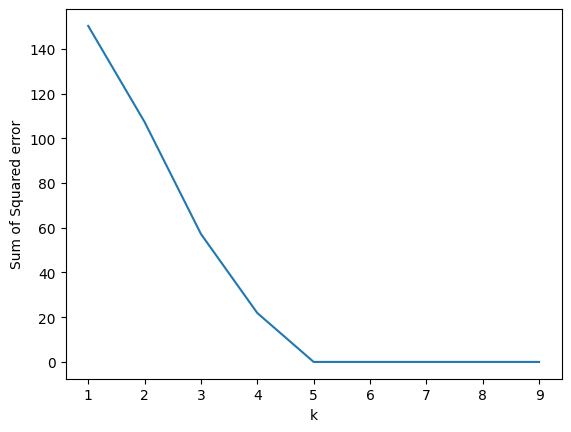

In [90]:
import matplotlib.pyplot as plt

plt.xlabel('k')
plt.ylabel('Sum of Squared error')
plt.plot(k_rng,sse)

In [91]:
# Run k-means to cluster the neighborhood into 5 clusters.

# set number of clusters
kclusters = 5

concat_grouped_clustering = concat_grouped.drop('Neighborhood', axis=1)


# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(concat_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([2, 3, 1, 3, 1, 0, 3, 1, 3, 2], dtype=int32)

In [92]:
# add clustering labels
concat_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [93]:
concat_venues_sorted.head()

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,2,BentallCentre,ATM,Gas Station,Mall,Supermarket,Train Station
1,3,"CentralKitsilano, Greektown",Supermarket,ATM,Gas Station,Mall,Train Station
2,1,"EastFairview, SouthCambie",Mall,ATM,Gas Station,Supermarket,Train Station
3,3,EastMountPleasant,Gas Station,Mall,ATM,Supermarket,Train Station
4,1,"NEDowntown, Gastown, HarbourCentre, Internatio...",Supermarket,ATM,Train Station,Mall,Gas Station


In [ ]:
# Create a new dataframe that includes the cluster as well as the facilities for each neighborhood.

# this is merged venues and ATM data
concat_merged = concat_dataframe[['name', 'categories', 'latitude', 'longitude',
       'Postal Code', 'locality', 'Neighborhood']]

# merge concat_grouped with concat_venues_sorted to add latitude/longitude for each neighborhood
concat_merged = concat_merged.join(concat_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

concat_merged.tail() 
#concat_merged.to_csv(r"crust\concat_merged.csv")

,name,categories,latitude,longitude,Postal Code,locality,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
54,Cibc ATM,ATM,49.270498,-123.136612,V6Z,Vancouver,SWDowntown,1,ATM,Supermarket,Gas Station,Mall,Train Station
55,Localcoin Bitcoin ATM - Davie Smoke & Bongs,ATM,49.278100,-123.127285,V6Z,Vancouver,SWDowntown,1,ATM,Supermarket,Gas Station,Mall,Train Station
56,TD Bank Financial Group,ATM,49.278631,-123.129196,V6Z,Vancouver,SWDowntown,1,ATM,Supermarket,Gas Station,Mall,Train Station
57,TD Bank Financial Group,ATM,49.286433,-123.121345,V7X,Vancouver,BentallCentre,2,ATM,Gas Station,Mall,Supermarket,Train Station
58,E-Cash Services Inc,ATM,49.284780,-123.115362,V7Y,Vancouver,PacificCentre,1,Mall,ATM,Gas Station,Supermarket,Train Station


In [95]:
# visualize on map

# create map
map_clusters = folium.Map(location=[49.2608724,-123.1139529], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(concat_merged['latitude'], concat_merged['longitude'], concat_merged['Neighborhood'], concat_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

**Cluster 1**

In [ ]:
Cluster_1 = concat_merged.loc[concat_merged['Cluster Labels'] == 0, concat_merged.columns[[1]+[2]+[3]+list(range(5, concat_merged.shape[1]))]]
Cluster_1
#Cluster_1.to_csv(r"crust\cluster1.csv")

,categories,latitude,longitude,locality,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
41,Gas Station,49.239983,-123.076838,Vancouver,"SERileyPark, SWKensington-CedarCottage, NEOakr...",0,Gas Station,Supermarket,ATM,Mall,Train Station
42,Gas Station,49.232400,-123.077575,Vancouver,"SERileyPark, SWKensington-CedarCottage, NEOakr...",0,Gas Station,Supermarket,ATM,Mall,Train Station
43,Gas Station,49.232701,-123.101034,Vancouver,"SERileyPark, SWKensington-CedarCottage, NEOakr...",0,Gas Station,Supermarket,ATM,Mall,Train Station
44,Supermarket,49.226457,-123.090450,Vancouver,"SERileyPark, SWKensington-CedarCottage, NEOakr...",0,Gas Station,Supermarket,ATM,Mall,Train Station
131,Gas Station,49.257076,-123.153303,Vancouver,"NWArbutusRidge, NEDunbar-Southlands",0,Gas Station,Supermarket,Mall,ATM,Train Station
132,Gas Station,49.257055,-123.153220,Vancouver,"NWArbutusRidge, NEDunbar-Southlands",0,Gas Station,Supermarket,Mall,ATM,Train Station
133,Gas Station,49.245006,-123.153810,Vancouver,"NWArbutusRidge, NEDunbar-Southlands",0,Gas Station,Supermarket,Mall,ATM,Train Station
134,Gas Station,49.257346,-123.168002,Vancouver,"NWArbutusRidge, NEDunbar-Southlands",0,Gas Station,Supermarket,Mall,ATM,Train Station
136,Supermarket,49.257554,-123.153669,Vancouver,"NWArbutusRidge, NEDunbar-Southlands",0,Gas Station,Supermarket,Mall,ATM,Train Station
137,Supermarket,49.248667,-123.154934,Vancouver,"NWArbutusRidge, NEDunbar-Southlands",0,Gas Station,Supermarket,Mall,ATM,Train Station


**Cluster 2**

In [ ]:
Cluster_2 = concat_merged.loc[concat_merged['Cluster Labels'] == 1, concat_merged.columns[[1]+[2]+[3]+ list(range(5, concat_merged.shape[1]))]]
Cluster_2
#Cluster_2.to_csv(r"crust\cluster2.csv")

,categories,latitude,longitude,locality,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
46,Train Station,49.262942,-123.114474,Vancouver,"WestMountPleasant, WestRileyPark",1,Supermarket,ATM,Mall,Train Station,Gas Station
47,Supermarket,49.254563,-123.109543,Vancouver,"WestMountPleasant, WestRileyPark",1,Supermarket,ATM,Mall,Train Station,Gas Station
48,Supermarket,49.264616,-123.114292,Vancouver,"WestMountPleasant, WestRileyPark",1,Supermarket,ATM,Mall,Train Station,Gas Station
49,Mall,49.230361,-123.110564,Vancouver,"WestMountPleasant, WestRileyPark",1,Supermarket,ATM,Mall,Train Station,Gas Station
50,Gas Station,49.248944,-123.127066,Vancouver,"EastFairview, SouthCambie",1,Mall,ATM,Gas Station,Supermarket,Train Station
51,Gas Station,49.234178,-123.127671,Vancouver,"EastFairview, SouthCambie",1,Mall,ATM,Gas Station,Supermarket,Train Station
52,Supermarket,49.263957,-123.115209,Vancouver,"EastFairview, SouthCambie",1,Mall,ATM,Gas Station,Supermarket,Train Station
53,Supermarket,49.248480,-123.126540,Vancouver,"EastFairview, SouthCambie",1,Mall,ATM,Gas Station,Supermarket,Train Station
54,Mall,49.232743,-123.117009,Vancouver,"EastFairview, SouthCambie",1,Mall,ATM,Gas Station,Supermarket,Train Station
55,Mall,49.260682,-123.116309,Vancouver,"EastFairview, SouthCambie",1,Mall,ATM,Gas Station,Supermarket,Train Station


**Cluster 3**

In [ ]:
Cluster_3 = concat_merged.loc[concat_merged['Cluster Labels'] == 2, concat_merged.columns[[1]+[2]+[3]+ list(range(5, concat_merged.shape[1]))]]
Cluster_3
#Cluster_3.to_csv(r"crust\cluster3.csv")

,categories,latitude,longitude,locality,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,ATM,49.281311,-123.054863,Vancouver,NorthHastings-Sunrise,2,ATM,Gas Station,Mall,Supermarket,Train Station
52,ATM,49.263953,-123.179434,Vancouver,"WestKitsilano, WestPointGrey, Jericho",2,ATM,Gas Station,Mall,Supermarket,Train Station
57,ATM,49.286433,-123.121345,Vancouver,BentallCentre,2,ATM,Gas Station,Mall,Supermarket,Train Station


**Cluster 4**

In [ ]:
Cluster_4 = concat_merged.loc[concat_merged['Cluster Labels'] == 3, concat_merged.columns[[1]+[2]+[3] + list(range(5, concat_merged.shape[1]))]]
Cluster_4
#Cluster_4.to_csv(r"crust\cluster4.csv")

,categories,latitude,longitude,locality,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
1,Gas Station,49.280783,-123.066097,Vancouver,NorthGrandview-Woodland,3,Gas Station,Supermarket,ATM,Mall,Train Station
2,Gas Station,49.283078,-123.073757,Vancouver,NorthGrandview-Woodland,3,Gas Station,Supermarket,ATM,Mall,Train Station
3,Gas Station,49.281411,-123.066394,Vancouver,NorthGrandview-Woodland,3,Gas Station,Supermarket,ATM,Mall,Train Station
4,Gas Station,49.285183,-123.063954,Vancouver,NorthGrandview-Woodland,3,Gas Station,Supermarket,ATM,Mall,Train Station
5,Supermarket,49.281003,-123.057190,Vancouver,NorthGrandview-Woodland,3,Gas Station,Supermarket,ATM,Mall,Train Station
6,Supermarket,49.274756,-123.069725,Vancouver,NorthGrandview-Woodland,3,Gas Station,Supermarket,ATM,Mall,Train Station
7,Supermarket,49.269814,-123.071254,Vancouver,NorthGrandview-Woodland,3,Gas Station,Supermarket,ATM,Mall,Train Station
8,Mall,49.272792,-123.073859,Vancouver,NorthGrandview-Woodland,3,Gas Station,Supermarket,ATM,Mall,Train Station
9,Mall,49.270071,-123.070059,Vancouver,NorthGrandview-Woodland,3,Gas Station,Supermarket,ATM,Mall,Train Station
10,Gas Station,49.269130,-123.056267,Vancouver,"SouthHastings-Sunrise, NorthRenfrew-Collingwood",3,ATM,Gas Station,Mall,Supermarket,Train Station


**Cluster 5**

In [ ]:
Cluster_5 = concat_merged.loc[concat_merged['Cluster Labels'] == 4, concat_merged.columns[[1]+[2]+[3] + list(range(5, concat_merged.shape[1]))]]
Cluster_5
#Cluster_5.to_csv(r"crust\cluster5.csv")

,categories,latitude,longitude,locality,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
23,Gas Station,49.239795,-123.065630,Vancouver,"SEKensington-CedarCottage, Victoria-Fraserview",4,Gas Station,Mall,ATM,Supermarket,Train Station
24,Gas Station,49.237162,-123.065083,Vancouver,"SEKensington-CedarCottage, Victoria-Fraserview",4,Gas Station,Mall,ATM,Supermarket,Train Station
25,Mall,49.233429,-123.074580,Vancouver,"SEKensington-CedarCottage, Victoria-Fraserview",4,Gas Station,Mall,ATM,Supermarket,Train Station


In [101]:
# After analyzing all the clusters, cluster-1 gives the Least common ATM locations. Selecting Least common ATM locations.
# Set '4th Most Common Venue' column as index on a Dataframe
Cluster_1.set_index("4th Most Common Venue", inplace = True)
 
# Select ATM locations

Least_ATM = Cluster_1.loc["ATM"]
Least_ATM
Least_ATM.to_csv(r"Least_ATM.csv")